In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
sns.set(rc={'figure.figsize': (11.7, 8.27)}, style="white", color_codes=True)
plt.rc('pdf', fonttype=42)  # Embed font

In [38]:
wiki_qdf = pd.read_csv('../../export/data/time-bm/query-collsize/wiki.csv', index_col=None)

In [5]:
for x in wiki_qdf.tail().name.str.split('/'):
    print(x)

['Fixture<IncNgTrieCompleter>', 'IncNgTrie', '4096', '10000', '108']
['Fixture<IncNgTrieCompleter>', 'IncNgTrie', '32768', '10000', '108']
['Fixture<IncNgTrieCompleter>', 'IncNgTrie', '262144', '10000', '108']
['Fixture<IncNgTrieCompleter>', 'IncNgTrie', '2097152', '10000', '108']
['Fixture<IncNgTrieCompleter>', 'IncNgTrie', '4560699', '10000', '108']


In [61]:
def convert_time(log_df):
    if len(log_df.time_unit.unique()) > 1:
            raise ValueError('Mixed time units')
    time_unit = log_df.time_unit.unique()[0]
    if time_unit == 'ms':
        log_df.cpu_time = log_df.cpu_time/(10**3)  # ms to s
        log_df.real_time = log_df.real_time/(10**3)
    elif time_unit == 'ns':
        log_df.cpu_time = log_df.cpu_time/(10**9)  # ns to s
        log_df.real_time = log_df.real_time/(10**9)
    else:
        raise ValueError('Unrecognised time unit')
    
def load_qtime_collsize_df(filename, collection, convert_units=True):
    query_df = pd.read_csv(filename, index_col=None)
    name_split = query_df.name.str.split('/')
    qac_impl = name_split.apply(lambda x: x[1])
    coll_size = name_split.apply(lambda x: int(x[2]))
    pqlog_nconv = name_split.apply(lambda x: int(x[3]))
    log_type = name_split.apply(lambda x: x[4])
    log_type.replace('108', 'LRLog', inplace=True)
    log_type.replace('115', 'SynthLog', inplace=True)
    
    query_df['qac_impl'] = qac_impl
    query_df['nrows'] = coll_size
    query_df['nconv'] = pqlog_nconv
    query_df['log_type'] = log_type
    query_df['collection'] = collection
    
    query_df.drop(['name','bytes_per_second','items_per_second',
                   'label','error_occurred','error_message'],
                   axis=1, inplace=True)
    
#     scaling_factor = 8
#     if query_df.iloc[-1]['nrows']/query_df.iloc[-2]['nrows'] != scaling_factor:
#         query_df = query_df[:-1] # Drop the last row
    
    if convert_units:
        if len(query_df.time_unit.unique()) > 1:
            raise ValueError('Mixed time units')
        time_unit = query_df.time_unit.unique()[0]
        if time_unit == 'ms':
            query_df.cpu_time = query_df.cpu_time/(10**3)  # ns to s
            query_df.real_time = query_df.real_time/(10**3)
        else:
            raise ValueError('Unrecognised time unit')
    
    return query_df

In [62]:
wiki_csize_df = load_qtime_collsize_df('../../export/data/time-bm/query-collsize/wiki.csv','wiki')
# cweb_csize_df = load_qtime_collsize_df('cweb') # TODO Update with CWEb
bing_csize_df = load_qtime_collsize_df('../../export/data/time-bm/query-collsize/bing.csv','bing') 
combined_qtime_csize = wiki_csize_df.append(bing_csize_df, ignore_index=True)

In [63]:
#combined_qtime_csize = wiki_csize_df.append(cweb_csize_df, ignore_index=True)
combined_qtime_csize

,iterations,real_time,cpu_time,time_unit,CompByesInvRate,CompBytesRate,NComp,NPQ,NPQInvRate,NPQRate,PQByesInvRate,PQBytes,PQBytesRate,qac_impl,nrows,nconv,log_type,collection
0,1,2.511140,2.687500,ms,2.276260e-06,439318.000,69443,66885,0.000040,24887.40000,0.000004,651446.0,242399.0000,HTrie,512,10000,SynthLog,wiki
1,1,7.091980,7.187500,ms,3.992090e-06,250496.000,109721,66885,0.000107,9305.74000,0.000011,651446.0,90636.0000,HTrie,4096,10000,SynthLog,wiki
2,1,10.741500,10.875000,ms,4.180770e-06,239191.000,160225,66885,0.000163,6150.34000,0.000017,651446.0,59903.1000,HTrie,32768,10000,SynthLog,wiki
3,1,72.649800,72.953100,ms,2.060600e-05,48529.500,214272,66885,0.001091,916.82200,0.000112,651446.0,8929.6500,HTrie,262144,10000,SynthLog,wiki
4,1,764.199000,764.266000,ms,1.788960e-04,5589.840,263759,66885,0.011427,87.51540,0.001173,651446.0,852.3820,HTrie,2097152,10000,SynthLog,wiki
5,1,743.106000,743.156000,ms,1.739550e-04,5748.610,263759,66885,0.011111,90.00130,0.001141,651446.0,876.5940,HTrie,4560699,10000,SynthLog,wiki
6,1,4.804380,4.859380,ms,2.085170e-06,479578.000,133853,142539,0.000034,29332.80000,0.000003,1567470.0,322567.0000,HTrie,512,10000,LRLog,wiki
7,1,16.805600,16.968800,ms,4.513680e-06,221549.000,216440,142539,0.000119,8400.09000,0.000011,1567470.0,92374.2000,HTrie,4096,10000,LRLog,wiki
8,1,18.803300,18.890600,ms,3.495100e-06,286115.000,319360,142539,0.000133,7545.49000,0.000012,1567470.0,82976.3000,HTrie,32768,10000,LRLog,wiki
9,1,153.118000,153.656000,ms,2.141760e-05,46690.600,429685,142539,0.001078,927.64900,0.000098,1567470.0,10201.2000,HTrie,262144,10000,LRLog,wiki


In [68]:
sliced_df = combined_qtime_csize[(combined_qtime_csize.qac_impl=='HTrie')]

In [97]:
max_idx = sliced_df.groupby(['collection', 'log_type'])['nrows'].idxmax()

In [98]:
max_idx

collection  log_type
bing        LRLog       59
            SynthLog    53
wiki        LRLog       11
            SynthLog     5
Name: nrows, dtype: int64

In [99]:
sliced_df.drop(max_idx, axis=0)

,iterations,real_time,cpu_time,time_unit,CompByesInvRate,CompBytesRate,NComp,NPQ,NPQInvRate,NPQRate,PQByesInvRate,PQBytes,PQBytesRate,qac_impl,nrows,nconv,log_type,collection
0,1,2.51114,2.68750,ms,0.000002,439318.00,69443,66885,0.000040,24887.4000,0.000004,651446.0,242399.000,HTrie,512,10000,SynthLog,wiki
1,1,7.09198,7.18750,ms,0.000004,250496.00,109721,66885,0.000107,9305.7400,0.000011,651446.0,90636.000,HTrie,4096,10000,SynthLog,wiki
2,1,10.74150,10.87500,ms,0.000004,239191.00,160225,66885,0.000163,6150.3400,0.000017,651446.0,59903.100,HTrie,32768,10000,SynthLog,wiki
3,1,72.64980,72.95310,ms,0.000021,48529.50,214272,66885,0.001091,916.8220,0.000112,651446.0,8929.650,HTrie,262144,10000,SynthLog,wiki
4,1,764.19900,764.26600,ms,0.000179,5589.84,263759,66885,0.011427,87.5154,0.001173,651446.0,852.382,HTrie,2097152,10000,SynthLog,wiki
6,1,4.80438,4.85938,ms,0.000002,479578.00,133853,142539,0.000034,29332.8000,0.000003,1567470.0,322567.000,HTrie,512,10000,LRLog,wiki
7,1,16.80560,16.96880,ms,0.000005,221549.00,216440,142539,0.000119,8400.0900,0.000011,1567470.0,92374.200,HTrie,4096,10000,LRLog,wiki
8,1,18.80330,18.89060,ms,0.000003,286115.00,319360,142539,0.000133,7545.4900,0.000012,1567470.0,82976.300,HTrie,32768,10000,LRLog,wiki
9,1,153.11800,153.65600,ms,0.000021,46690.60,429685,142539,0.001078,927.6490,0.000098,1567470.0,10201.200,HTrie,262144,10000,LRLog,wiki
10,1,1465.84000,1466.05000,ms,0.000166,6014.95,525867,142539,0.010285,97.2268,0.000935,1567470.0,1069.180,HTrie,2097152,10000,LRLog,wiki


## Query time $\mid P \mid $ benchmarks

In [10]:
wiki_plenq_df = pd.read_csv('../../export/data/time-bm/query-plen/wiki.csv', index_col=None)

In [11]:
combined_plenq_df = wiki_plenq_df

In [12]:
len(wiki_plenq_df.name.str.split('/')[0])

7

In [13]:
name_split = wiki_plenq_df.name.str.split('/')

In [14]:
name_split[0]

['Fixture<HTrieCompleter>', 'HTrie', '4560699', '10000', '115', '0', '5']

In [15]:
def load_qtime_plen_df(filename, collection, convert_units=True):
    query_df = pd.read_csv(filename, index_col=None)
    name_split = query_df.name.str.split('/')
    
    qac_impl = name_split.apply(lambda x: x[1])
    coll_size = name_split.apply(lambda x: int(x[2]))
    pqlog_nconv = name_split.apply(lambda x: int(x[3]))
    log_type = name_split.apply(lambda x: x[4])
    log_type.replace('108', 'LRLog', inplace=True)
    log_type.replace('115', 'SynthLog', inplace=True)
    max_plen = name_split.apply(lambda x: int(x[-1]))
    
    query_df['qac_impl'] = qac_impl
    query_df['nrows'] = coll_size
    query_df['nconv'] = pqlog_nconv
    query_df['log_type'] = log_type
    query_df['collection'] = collection
    
    query_df.drop(['name','bytes_per_second','items_per_second',
                   'label','error_occurred','error_message'], axis=1, inplace=True)
    query_df['max_plen'] = max_plen
    
    if convert_units:
        if len(query_df.time_unit.unique()) > 1:
            raise ValueError('Mixed time units')
        time_unit = query_df.time_unit.unique()[0]
        if time_unit == 'ms':
            query_df.cpu_time = query_df.cpu_time/(10**3)  # ns to s
            query_df.real_time = query_df.real_time/(10**3)
        else:
            raise ValueError('Unrecognised time unit')
    
    return query_df

In [32]:
wiki_plenq_df = load_qtime_plen_df('../../export/data/time-bm/query-plen/wiki.csv', 'wiki')
wiki_plenq_df

,iterations,real_time,cpu_time,time_unit,CompByesInvRate,CompBytesRate,NComp,NPQ,NPQInvRate,NPQRate,PQByesInvRate,PQBytes,PQBytesRate,qac_impl,nrows,nconv,log_type,collection,max_plen
0,1,3829.75000,3829.47000,ms,3.100830e-03,3.224950e+02,65036,40807,0.093843,10.656000,0.006674,573750.0,149.82500,HTrie,4560699,10000,SynthLog,wiki,5
1,1,838.21800,838.75000,ms,4.017970e-04,2.488820e+03,136778,41852,0.020041,49.898100,0.001689,496657.0,592.13900,HTrie,4560699,10000,SynthLog,wiki,9
2,1,748.22300,747.62500,ms,1.981400e-04,5.046940e+03,239189,50598,0.014776,67.678300,0.001541,485150.0,648.92200,HTrie,4560699,10000,SynthLog,wiki,13
3,1,725.90400,726.07800,ms,1.731590e-04,5.775050e+03,260249,56316,0.012893,77.561900,0.001447,501770.0,691.06900,HTrie,4560699,10000,SynthLog,wiki,17
4,1,685.42400,686.10900,ms,1.610050e-04,6.210980e+03,263214,60423,0.011355,88.066100,0.001284,534278.0,778.70700,HTrie,4560699,1000,SynthLog,wiki,21
5,1,628.45300,628.75000,ms,1.472180e-04,6.792630e+03,263608,62981,0.009983,100.169000,0.001113,564897.0,898.44500,HTrie,4560699,10000,SynthLog,wiki,25
6,1,612.86700,612.84400,ms,1.434650e-04,6.970360e+03,263643,64453,0.009508,105.170000,0.001043,587848.0,959.21400,HTrie,4560699,10000,SynthLog,wiki,29
7,1,632.88800,632.95300,ms,1.481700e-04,6.748990e+03,263645,65340,0.009687,103.230000,0.001046,604841.0,955.58600,HTrie,4560699,10000,SynthLog,wiki,33
8,1,6457.96000,6457.94000,ms,2.244260e-03,4.455820e+02,147333,93378,0.069159,14.459400,0.004543,1421500.0,220.11700,HTrie,4560699,10000,LRLog,wiki,5
9,1,1419.66000,1419.23000,ms,3.427690e-04,2.917420e+03,263820,93024,0.015257,65.545200,0.001129,1257330.0,885.92200,HTrie,4560699,10000,LRLog,wiki,9


In [31]:
pd.read_csv('../../export/data/time-bm/query-plen/wiki.csv')

,name,iterations,real_time,cpu_time,time_unit,bytes_per_second,items_per_second,label,error_occurred,error_message,CompByesInvRate,CompBytesRate,NComp,NPQ,NPQInvRate,NPQRate,PQByesInvRate,PQBytes,PQBytesRate
0,Fixture<HTrieCompleter>/HTrie/4560699/10000/11...,1,3.829750e+06,3.829470e+06,ms,NaN,NaN,NaN,NaN,NaN,3.100830e-03,3.224950e+02,65036,40807,0.093843,10.656000,0.006674,573750.0,149.82500
1,Fixture<HTrieCompleter>/HTrie/4560699/10000/11...,1,8.382180e+05,8.387500e+05,ms,NaN,NaN,NaN,NaN,NaN,4.017970e-04,2.488820e+03,136778,41852,0.020041,49.898100,0.001689,496657.0,592.13900
2,Fixture<HTrieCompleter>/HTrie/4560699/10000/11...,1,7.482230e+05,7.476250e+05,ms,NaN,NaN,NaN,NaN,NaN,1.981400e-04,5.046940e+03,239189,50598,0.014776,67.678300,0.001541,485150.0,648.92200
3,Fixture<HTrieCompleter>/HTrie/4560699/10000/11...,1,7.259040e+05,7.260780e+05,ms,NaN,NaN,NaN,NaN,NaN,1.731590e-04,5.775050e+03,260249,56316,0.012893,77.561900,0.001447,501770.0,691.06900
4,Fixture<HTrieCompleter>/HTrie/4560699/1000/115...,1,6.854240e+05,6.861090e+05,ms,NaN,NaN,NaN,NaN,NaN,1.610050e-04,6.210980e+03,263214,60423,0.011355,88.066100,0.001284,534278.0,778.70700
5,Fixture<HTrieCompleter>/HTrie/4560699/10000/11...,1,6.284530e+05,6.287500e+05,ms,NaN,NaN,NaN,NaN,NaN,1.472180e-04,6.792630e+03,263608,62981,0.009983,100.169000,0.001113,564897.0,898.44500
6,Fixture<HTrieCompleter>/HTrie/4560699/10000/11...,1,6.128670e+05,6.128440e+05,ms,NaN,NaN,NaN,NaN,NaN,1.434650e-04,6.970360e+03,263643,64453,0.009508,105.170000,0.001043,587848.0,959.21400
7,Fixture<HTrieCompleter>/HTrie/4560699/10000/11...,1,6.328880e+05,6.329530e+05,ms,NaN,NaN,NaN,NaN,NaN,1.481700e-04,6.748990e+03,263645,65340,0.009687,103.230000,0.001046,604841.0,955.58600
8,Fixture<HTrieCompleter>/HTrie/4560699/10000/10...,1,6.457960e+06,6.457940e+06,ms,NaN,NaN,NaN,NaN,NaN,2.244260e-03,4.455820e+02,147333,93378,0.069159,14.459400,0.004543,1421500.0,220.11700
9,Fixture<HTrieCompleter>/HTrie/4560699/10000/10...,1,1.419660e+06,1.419230e+06,ms,NaN,NaN,NaN,NaN,NaN,3.427690e-04,2.917420e+03,263820,93024,0.015257,65.545200,0.001129,1257330.0,885.92200


## Plots

- For each bin, plot the ratio of cpu time (as a fraction of total query time)
- Do this for each of the implementations


In [18]:
qac_impl = 'HTrie'

In [19]:
max_synth_time = combined_qtime_csize[(combined_qtime_csize.qac_impl==qac_impl)\
                                      & (combined_qtime_csize.log_type=='SynthLog')]['cpu_time'].max()
max_lr_time = combined_qtime_csize[(combined_qtime_csize.qac_impl==qac_impl)\
                                      & (combined_qtime_csize.log_type=='LRLog')]['cpu_time'].max()

print(max_synth_time, max_lr_time)

764.266 1466.05


In [26]:
combined_qtime_csize[(combined_qtime_csize.qac_impl==qac_impl)\
                      & (combined_qtime_csize.log_type=='SynthLog')]

,iterations,real_time,cpu_time,time_unit,CompByesInvRate,CompBytesRate,NComp,NPQ,NPQInvRate,NPQRate,PQByesInvRate,PQBytes,PQBytesRate,qac_impl,nrows,nconv,log_type,collection
0,1,2.51114,2.6875,ms,0.000002,439318.00,69443,66885,0.000040,24887.4000,0.000004,651446.0,242399.000,HTrie,512,10000,SynthLog,wiki
1,1,7.09198,7.1875,ms,0.000004,250496.00,109721,66885,0.000107,9305.7400,0.000011,651446.0,90636.000,HTrie,4096,10000,SynthLog,wiki
2,1,10.74150,10.8750,ms,0.000004,239191.00,160225,66885,0.000163,6150.3400,0.000017,651446.0,59903.100,HTrie,32768,10000,SynthLog,wiki
3,1,72.64980,72.9531,ms,0.000021,48529.50,214272,66885,0.001091,916.8220,0.000112,651446.0,8929.650,HTrie,262144,10000,SynthLog,wiki
4,1,764.19900,764.2660,ms,0.000179,5589.84,263759,66885,0.011427,87.5154,0.001173,651446.0,852.382,HTrie,2097152,10000,SynthLog,wiki
5,1,743.10600,743.1560,ms,0.000174,5748.61,263759,66885,0.011111,90.0013,0.001141,651446.0,876.594,HTrie,4560699,10000,SynthLog,wiki


In [20]:
sliced_df = wiki_plenq_df[wiki_plenq_df.qac_impl==qac_impl]
sliced_df.loc[sliced_df.log_type=='SynthLog', 'norm_time'] = sliced_df[
                                                                sliced_df.log_type == 'SynthLog']['cpu_time']\
                                                                /max_synth_time
sliced_df.loc[sliced_df.log_type=='LRLog', 'norm_time'] = sliced_df[
                                                                sliced_df.log_type == 'LRLog']['cpu_time']\
                                                                /max_lr_time

/Users/uthoombayil/miniconda2/envs/py37/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/uthoombayil/miniconda2/envs/py37/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [25]:
wiki_plenq_df[(wiki_plenq_df.qac_impl==qac_impl) & (wiki_plenq_df.log_type=='SynthLog')]['cpu_time'].max()

3829.47

In [27]:
wiki_plenq_df

,iterations,real_time,cpu_time,time_unit,CompByesInvRate,CompBytesRate,NComp,NPQ,NPQInvRate,NPQRate,PQByesInvRate,PQBytes,PQBytesRate,qac_impl,nrows,nconv,log_type,collection,max_plen
0,1,3829.75000,3829.47000,ms,3.100830e-03,3.224950e+02,65036,40807,0.093843,10.656000,0.006674,573750.0,149.82500,HTrie,4560699,10000,SynthLog,wiki,5
1,1,838.21800,838.75000,ms,4.017970e-04,2.488820e+03,136778,41852,0.020041,49.898100,0.001689,496657.0,592.13900,HTrie,4560699,10000,SynthLog,wiki,9
2,1,748.22300,747.62500,ms,1.981400e-04,5.046940e+03,239189,50598,0.014776,67.678300,0.001541,485150.0,648.92200,HTrie,4560699,10000,SynthLog,wiki,13
3,1,725.90400,726.07800,ms,1.731590e-04,5.775050e+03,260249,56316,0.012893,77.561900,0.001447,501770.0,691.06900,HTrie,4560699,10000,SynthLog,wiki,17
4,1,685.42400,686.10900,ms,1.610050e-04,6.210980e+03,263214,60423,0.011355,88.066100,0.001284,534278.0,778.70700,HTrie,4560699,1000,SynthLog,wiki,21
5,1,628.45300,628.75000,ms,1.472180e-04,6.792630e+03,263608,62981,0.009983,100.169000,0.001113,564897.0,898.44500,HTrie,4560699,10000,SynthLog,wiki,25
6,1,612.86700,612.84400,ms,1.434650e-04,6.970360e+03,263643,64453,0.009508,105.170000,0.001043,587848.0,959.21400,HTrie,4560699,10000,SynthLog,wiki,29
7,1,632.88800,632.95300,ms,1.481700e-04,6.748990e+03,263645,65340,0.009687,103.230000,0.001046,604841.0,955.58600,HTrie,4560699,10000,SynthLog,wiki,33
8,1,6457.96000,6457.94000,ms,2.244260e-03,4.455820e+02,147333,93378,0.069159,14.459400,0.004543,1421500.0,220.11700,HTrie,4560699,10000,LRLog,wiki,5
9,1,1419.66000,1419.23000,ms,3.427690e-04,2.917420e+03,263820,93024,0.015257,65.545200,0.001129,1257330.0,885.92200,HTrie,4560699,10000,LRLog,wiki,9


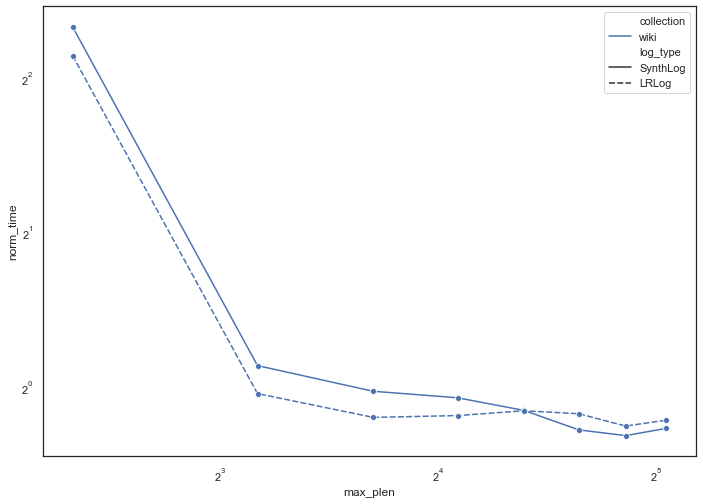

In [21]:
sns.lineplot(x='max_plen', y='norm_time', data=sliced_df, hue='collection', style='log_type', marker='o')
plt.yscale('log', basey=2)
plt.xscale('log', basex=2)

In [23]:
def plot_qtime_plen(combined_plenq_df, combined_qtime_csize,
                    qac_impl, outfile,
                    cutoff_nrows=None, style=None,
                    xlabel="Collection size", ylabel="Build time"):
    max_synth_time = combined_qtime_csize[(combined_qtime_csize.qac_impl==qac_impl)\
                       & (combined_qtime_csize.log_type=='SynthLog')]['cpu_time'].max()
    max_lr_time = combined_qtime_csize[(combined_qtime_csize.qac_impl==qac_impl)\
                       & (combined_qtime_csize.log_type=='LRLog')]['cpu_time'].max()

    sliced_df = wiki_plenq_df[wiki_plenq_df.qac_impl==qac_impl]
    sliced_df.loc[sliced_df.log_type=='SynthLog', 'norm_time']\
            = sliced_df[sliced_df.log_type == 'SynthLog']['cpu_time']/max_synth_time
    sliced_df.loc[sliced_df.log_type=='LRLog', 'norm_time']\
            = sliced_df[sliced_df.log_type == 'LRLog']['cpu_time']/max_lr_time
        
    
    sns.lineplot(x='max_plen', y='norm_time', data=sliced_df,
                 hue='collection', style='log_type', marker='o',
                 markevery=1, alpha=.6)
    ax.set_xscale('log', basex=2)
    ax.set_yscale('log', basey=2)


In [35]:
np.log2(4560699)

22.120823526729446

In [36]:
np.log2(2097152)

21.0

In [37]:
np.log2(262144)

18.0